# Import

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Data gathering

In [16]:
diamonds = pd.read_csv('data/diamonds.csv', sep = ',')
diamonds_rick = pd.read_csv('data/rick_diamonds.csv', sep = ',')
diamonds_rick_predicted = diamonds_rick

## Data Visualization

In [77]:
print(diamonds.shape)
print(diamonds.head())
print(diamonds['price'].describe())
diamonds['clarity'].unique()

(48940, 10)
   carat        cut color clarity  depth  table  price     x     y     z
0   0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
1   0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
2   0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
3   0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
4   0.24  Very Good     J    VVS2   62.8   57.0    336  3.94  3.96  2.48
count    48940.000000
mean      3934.409644
std       3989.333861
min        326.000000
25%        949.000000
50%       2401.000000
75%       5331.250000
max      18823.000000
Name: price, dtype: float64


array(['SI1', 'VS1', 'VS2', 'SI2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [95]:
print(diamonds_rick.head())
print(diamonds_rick['clarity'].unique())

   carat        cut color clarity  depth  table     x     y     z  \
0   0.91  Very Good     H     SI2   63.4   57.0  6.10  6.18  3.89   
1   0.38       Good     F     VS2   60.3   61.0  4.68  4.71  2.83   
2   0.52      Ideal     H     VS2   61.8   56.0  5.19  5.16  3.20   
3   1.10      Ideal     G     VS1   61.3   56.0  6.65  6.69  4.09   
4   2.28      Ideal     G     SI2   61.6   57.0  8.44  8.37  5.18   

   price_predicted  
0                0  
1                0  
2                0  
3                0  
4                0  
['SI2' 'VS2' 'VS1' 'SI1' 'IF' 'VVS2' 'I1' 'VVS1']


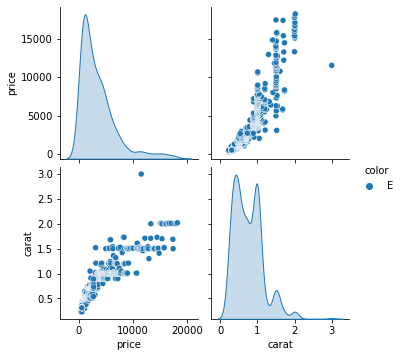

In [53]:
sns.pairplot(diamonds[(diamonds['cut']=='Good')&(diamonds['color']=='E')][['price','carat','color']], hue = 'color')

# Data cleaning

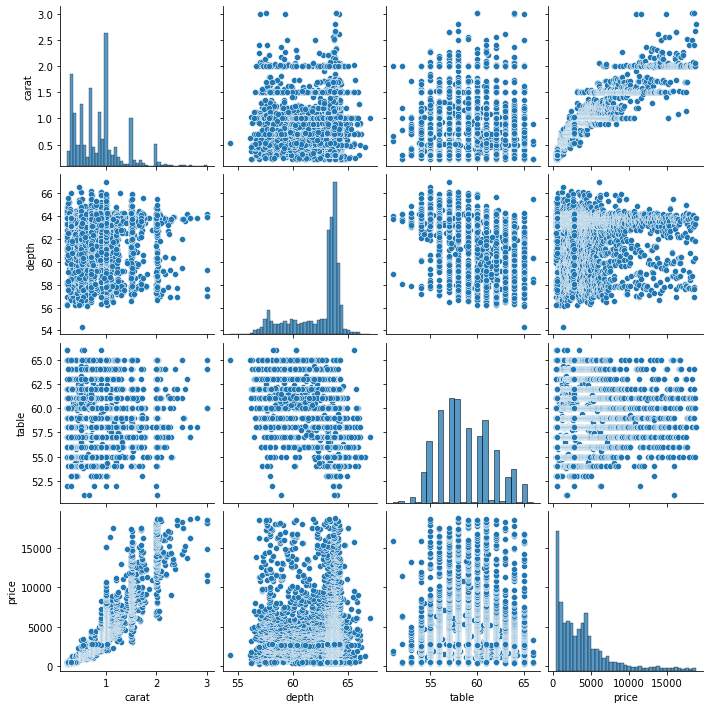

In [39]:
sns.pairplot(diamonds[diamonds['cut'] == 'Good'][['carat','depth','table','price']])

# Price prediction

In [157]:
#'E', 'I', 'J', 'H', 'F', 'G', 'D'
#'Premium', 'Good', 'Very Good', 'Ideal', 'Fair'
#'SI1', 'VS1', 'VS2', 'SI2', 'VVS2', 'VVS1', 'I1', 'IF'
model = LinearRegression()
diamonds_rick_predicted['price_predicted'] = 0
for clarity in diamonds_rick_predicted['clarity'].unique():
    for color in diamonds_rick_predicted['color'].unique():
        X = diamonds[(diamonds['clarity']==clarity)&(diamonds['color']==color)][['carat','table','depth']]
        y = diamonds[(diamonds['clarity']==clarity)&(diamonds['color']==color)]['price']
        model.fit(X,y)
        X_rick = diamonds_rick_predicted[(diamonds_rick_predicted['clarity']==clarity)&(diamonds_rick_predicted['color']==color)][['carat','table','depth']]
        y_pred = model.predict(X_rick)
        diamonds_rick_predicted.loc[(diamonds_rick_predicted['clarity']==clarity)&(diamonds_rick_predicted['color']==color),'price_predicted'] = y_pred

# Saving the csv

In [158]:
diamonds_rick_predicted.to_csv('diamonds_rick_predicted.csv')

# Notes

## Price predicted

1 - Price predicted as the mean of prices from diamonds.csv(3980)
2 - Price predicted using carat as the only variable from diamonds.csv(1605)
3 - Price predicted using carat and depth variables from diamonds.csv(1598)
Price predicted using carat and table variables from diamonds.csv(1595)
Price predicted using carat,table and depth variables from diamonds.csv(1583)
Price predicted using carat,table,depth and clarity variables from diamonds.csv(1217); Cut does not seen to influence the model
Price predicted using carat,table,depth, clarity and color variables from diamonds.csv(987); Cut does not seen to influence the model